In [6]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from pygame import mixer
import matplotlib.pyplot as plt

In [7]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
single_eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
model = load_model('C:/Users/nirbh/Desktop/Driver Drowsiness Detection/projectfiles/models/model1.h5')
mixer.init()
sound = mixer.Sound('C:/Users/nirbh/Desktop/Driver Drowsiness Detection/projectfiles/alarm.wav')

cap = cv2.VideoCapture(0)
Score = 0
run = True
drowsy_text = "Drowsy"
not_drowsy_text = "Not Drowsy"

In [8]:

while run:
    ret, frame = cap.read()
    height, width = frame.shape[0:2]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=3)
    seyes = single_eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)

    cv2.rectangle(frame, (0, height-50), (200, height), (0, 0, 0), thickness=cv2.FILLED)

    for (x, y, w, h) in seyes:
        cv2.rectangle(frame, pt1=(x, y), pt2=(x+w, y+h), color=(255, 0, 0), thickness=3)

    for (ex, ey, ew, eh) in seyes:
        eye = frame[ey:ey+eh, ex:ex+w]
        eye = cv2.resize(eye, (80, 80))
        eye = eye/255
        eye = eye.reshape(80, 80, 3)
        debug_eye = eye
        eye = np.expand_dims(eye, axis=0)

        prediction = model.predict(eye)

        if prediction[0][0] > 0.30:
            cv2.putText(frame, 'Closed', (10, height-70), fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=1, color=(255, 255, 255), thickness=1, lineType=cv2.LINE_AA)
            cv2.putText(frame, f'Score: {Score}', (10, height-20), fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=1, color=(255, 255, 255), thickness=1, lineType=cv2.LINE_AA)
            Score = Score + 1
            if Score > 5:
                try:
                    sound.play()
                    cv2.putText(frame, drowsy_text, (10, 50), fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=1.5, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)
                except:
                    pass
        elif prediction[0][1] > 0.90:
            cv2.putText(frame, 'Open', (10, height-70), fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=1, color=(255, 255, 255), thickness=1, lineType=cv2.LINE_AA)
            cv2.putText(frame, f'Score: {Score}', (10, height-20), fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=1, color=(255, 255, 255), thickness=1, lineType=cv2.LINE_AA)
            Score = Score - 1
            if Score < 0:
                Score = 0
            #else:
                cv2.putText(frame, not_drowsy_text, (10, 50), fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL, fontScale=1.5, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        run = False
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 103ms/step


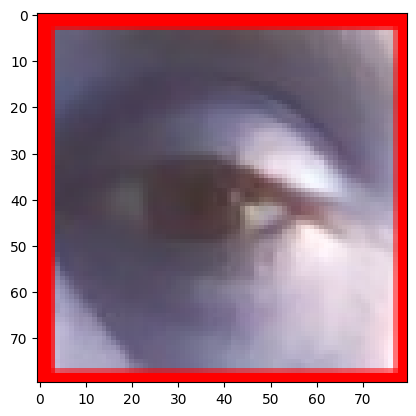

In [10]:
plt.imshow(np.array(debug_eye))